In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='ϵLUMO',
    map_property=lambda t: get_property(t, "ϵLUMO"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [0.0016547541874791492, 0.0008971612042351557, 0.0007807715820482075, 0.0007144755573169133, 0.0006689361219785269, 0.0006363898430432523, 0.0006090479338139404, 0.0005830362396314574, 0.0005628441832680913, 0.0005403798359909067, 0.0005191466941910836, 0.0005056849705389345, 0.0004941137982775961, 0.00048260713612674055, 0.00047240204346657216, 0.00046251360755821707, 0.000453617563294301, 0.00044520620451268507, 0.0004380632080580399, 0.0004305688304378239, 0.0004199650494421548, 0.0004135385496840979, 0.00040742352274797465, 0.00040254002787145656, 0.0003963536389785377, 0.00039161778376332917, 0.00038543962185852166, 0.000381379952053485, 0.0003767152877547218, 0.00037083620888206446, 0.00036323916311833563, 0.0003591977405227043, 0.0003551595753143526, 0.00035042141838792767, 0.00034679042913755983, 0.0003431718339784624, 0.0003390757063674563, 0.00033598098543776534, 0.00033233724144367846, 0.0003289565102177026, 0.00032369485290453375, 0.0003206790321311545, 0.00031779017013056266, 0.00031564363884824676, 0.0003121313921457722, 0.0003103434503166403, 0.0003076236302233941, 0.0003045039385212443, 0.00030219486273455837, 0.00029921841467002154, 0.0002954525383365034, 0.00029299645424746165, 0.000290277312407152, 0.0002887398326261874, 0.0002865932179852686, 0.00028393912133306467, 0.00028248903479087594, 0.00027972498992884644, 0.00027848954587514173, 0.0002761897673926868, 0.0002724604225075401, 0.0002709950925518385, 0.000269487833755758, 0.00026756875314992934, 0.00026609756430970896, 0.000264490779471232, 0.00026274819383015883, 0.0002619602135300803, 0.000259809856852569, 0.0002586587437812019, 0.0002558481075767392, 0.0002544991037901224, 0.0002535752448887312, 0.0002520948756697187, 0.00025104438622353944, 0.0002501865697060517, 0.000248832855721033, 0.00024784785838896585, 0.0002467524134334573, 0.0002458175585153989, 0.00024327399132687873, 0.00024236947513920167, 0.00024150210651593964, 0.00024061906501203432, 0.0002394814573128813, 0.00023872809530504858, 0.00023790279635290152, 0.0002366197287198146, 0.00023604360867887384, 0.0002351295410271584, 0.00023285415562614734, 0.00023251434708174376, 0.00023161934156737957, 0.00023083917772131414, 0.00022983671455781182, 0.00022912080338223558, 0.00022818056867830787, 0.0002280164089927755, 0.0002273076736117934, 0.00022623373575242527]
</details>


<details>
  <summary>losses_val_mean</summary>
  [0.001301541898383924, 0.0009042363593771592, 0.0007169383452329087, 0.0007899404082137268, 0.0006011463344801638, 0.0007325559113228826, 0.000606134356621696, 0.0006582628717804892, 0.0005702000024604948, 0.000501363084933728, 0.0004836672120374564, 0.00047407928214389313, 0.0005586501992967668, 0.00047826475264066973, 0.00045865137041330633, 0.0004493171727426516, 0.0004333587164516568, 0.0004802325980183915, 0.00041923253063640874, 0.0004141775850051479, 0.00040253467483206183, 0.00040781929147658925, 0.0004113924298622334, 0.0004328029877362942, 0.000390828666850112, 0.0003954894786576101, 0.0003807788816464567, 0.0003831856478849847, 0.00039757986429900683, 0.0003942452459435287, 0.00037024121860868144, 0.0003678545080352177, 0.0003724286821450685, 0.0003833629399258872, 0.0003715157370890515, 0.00034347924918524877, 0.000346210690125117, 0.0003311631064446319, 0.0003335627878522625, 0.0003259283407375868, 0.0003232853168411836, 0.0003283820733526821, 0.00033193130273585043, 0.0003104541710020897, 0.0003298661426252527, 0.00031235045153492347, 0.0003488758552918529, 0.0003245136613582368, 0.0003160539051682717, 0.000300883710211547, 0.0002930848776842659, 0.00029613298947459823, 0.0002946472783213882, 0.00029513984817135616, 0.0002953043796904836, 0.0002972000036055081, 0.00028254679927908904, 0.0002915221743304932, 0.00028406562266133516, 0.00029672797568177576, 0.0002818848869349584, 0.0002696372779367746, 0.00027937814099874783, 0.00027327808449467483, 0.00027085448656827943, 0.00031304000863680796, 0.00027321677501136927, 0.0002688768686128706, 0.0002616067731531612, 0.00026243330155847016, 0.00026403047974093877, 0.00026601019512856604, 0.00028776677974645844, 0.0002620020859410714, 0.0002846281632698373, 0.0002621092628050743, 0.00025842617246984317, 0.0002612304121329306, 0.00025420852365848747, 0.0002653880992060791, 0.0002625737944236191, 0.00026289842242582334, 0.0002463486402319325, 0.00024568555307824465, 0.00024999171531919995, 0.0002470832564077859, 0.00024381773869924166, 0.0002562283808284765, 0.00025118681310391653, 0.0002480355290345203, 0.00024202742175033097, 0.00024843200238999617, 0.0002422437585992698, 0.0002506040901022252, 0.0002602224559566111, 0.0002400207454122082, 0.0002394089665931169, 0.00024159144960595773, 0.00024197802309233445, 0.00024418718790944813]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [0.0016547541874791492, 0.0008971612042351557, 0.0007807715820482075, 0.0007144755573169133, 0.0006689361219785269, 0.0006363898430432523, 0.0006090479338139404, 0.0005830362396314574, 0.0005628441832680913, 0.0005403798359909067, 0.0005191466941910836, 0.0005056849705389345, 0.0004941137982775961, 0.00048260713612674055, 0.00047240204346657216, 0.00046251360755821707, 0.000453617563294301, 0.00044520620451268507, 0.0004380632080580399, 0.0004305688304378239, 0.0004199650494421548, 0.0004135385496840979, 0.00040742352274797465, 0.00040254002787145656, 0.0003963536389785377, 0.00039161778376332917, 0.00038543962185852166, 0.000381379952053485, 0.0003767152877547218, 0.00037083620888206446, 0.00036323916311833563, 0.0003591977405227043, 0.0003551595753143526, 0.00035042141838792767, 0.00034679042913755983, 0.0003431718339784624, 0.0003390757063674563, 0.00033598098543776534, 0.00033233724144367846, 0.0003289565102177026, 0.00032369485290453375, 0.0003206790321311545, 0.00031779017013056266, 0.00031564363884824676, 0.0003121313921457722, 0.0003103434503166403, 0.0003076236302233941, 0.0003045039385212443, 0.00030219486273455837, 0.00029921841467002154, 0.0002954525383365034, 0.00029299645424746165, 0.000290277312407152, 0.0002887398326261874, 0.0002865932179852686, 0.00028393912133306467, 0.00028248903479087594, 0.00027972498992884644, 0.00027848954587514173, 0.0002761897673926868, 0.0002724604225075401, 0.0002709950925518385, 0.000269487833755758, 0.00026756875314992934, 0.00026609756430970896, 0.000264490779471232, 0.00026274819383015883, 0.0002619602135300803, 0.000259809856852569, 0.0002586587437812019, 0.0002558481075767392, 0.0002544991037901224, 0.0002535752448887312, 0.0002520948756697187, 0.00025104438622353944, 0.0002501865697060517, 0.000248832855721033, 0.00024784785838896585, 0.0002467524134334573, 0.0002458175585153989, 0.00024327399132687873, 0.00024236947513920167, 0.00024150210651593964, 0.00024061906501203432, 0.0002394814573128813, 0.00023872809530504858, 0.00023790279635290152, 0.0002366197287198146, 0.00023604360867887384, 0.0002351295410271584, 0.00023285415562614734, 0.00023251434708174376, 0.00023161934156737957, 0.00023083917772131414, 0.00022983671455781182, 0.00022912080338223558, 0.00022818056867830787, 0.0002280164089927755, 0.0002273076736117934, 0.00022623373575242527]
losses_val_mean_MSE_Ha = [0.001301541898383924, 0.0009042363593771592, 0.0007169383452329087, 0.0007899404082137268, 0.0006011463344801638, 0.0007325559113228826, 0.000606134356621696, 0.0006582628717804892, 0.0005702000024604948, 0.000501363084933728, 0.0004836672120374564, 0.00047407928214389313, 0.0005586501992967668, 0.00047826475264066973, 0.00045865137041330633, 0.0004493171727426516, 0.0004333587164516568, 0.0004802325980183915, 0.00041923253063640874, 0.0004141775850051479, 0.00040253467483206183, 0.00040781929147658925, 0.0004113924298622334, 0.0004328029877362942, 0.000390828666850112, 0.0003954894786576101, 0.0003807788816464567, 0.0003831856478849847, 0.00039757986429900683, 0.0003942452459435287, 0.00037024121860868144, 0.0003678545080352177, 0.0003724286821450685, 0.0003833629399258872, 0.0003715157370890515, 0.00034347924918524877, 0.000346210690125117, 0.0003311631064446319, 0.0003335627878522625, 0.0003259283407375868, 0.0003232853168411836, 0.0003283820733526821, 0.00033193130273585043, 0.0003104541710020897, 0.0003298661426252527, 0.00031235045153492347, 0.0003488758552918529, 0.0003245136613582368, 0.0003160539051682717, 0.000300883710211547, 0.0002930848776842659, 0.00029613298947459823, 0.0002946472783213882, 0.00029513984817135616, 0.0002953043796904836, 0.0002972000036055081, 0.00028254679927908904, 0.0002915221743304932, 0.00028406562266133516, 0.00029672797568177576, 0.0002818848869349584, 0.0002696372779367746, 0.00027937814099874783, 0.00027327808449467483, 0.00027085448656827943, 0.00031304000863680796, 0.00027321677501136927, 0.0002688768686128706, 0.0002616067731531612, 0.00026243330155847016, 0.00026403047974093877, 0.00026601019512856604, 0.00028776677974645844, 0.0002620020859410714, 0.0002846281632698373, 0.0002621092628050743, 0.00025842617246984317, 0.0002612304121329306, 0.00025420852365848747, 0.0002653880992060791, 0.0002625737944236191, 0.00026289842242582334, 0.0002463486402319325, 0.00024568555307824465, 0.00024999171531919995, 0.0002470832564077859, 0.00024381773869924166, 0.0002562283808284765, 0.00025118681310391653, 0.0002480355290345203, 0.00024202742175033097, 0.00024843200238999617, 0.0002422437585992698, 0.0002506040901022252, 0.0002602224559566111, 0.0002400207454122082, 0.0002394089665931169, 0.00024159144960595773, 0.00024197802309233445, 0.00024418718790944813]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE ϵLUMO, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE ϵLUMO, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.08151278048880485

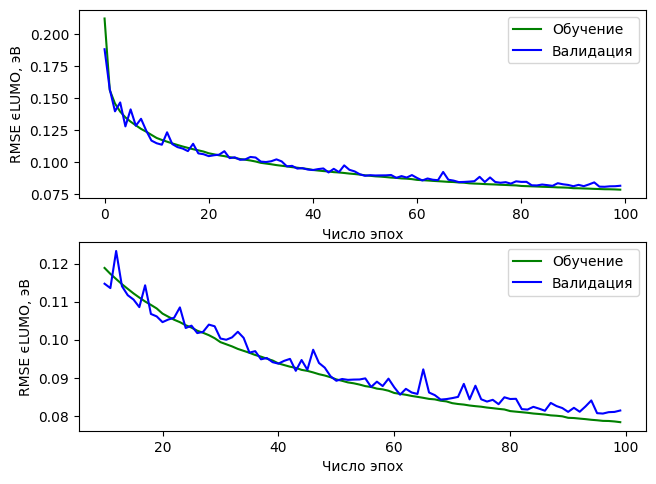